Sample Dataset

In [1]:
import pandas as pd

sensus = {
    'tinggi': [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat' : [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk': [
        'pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 
        'wanita'
    ]
}

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


Import modul pandas yang kemudian data dictionary ditampung ke sebuah variabel sensus.  Data dictionary berisi tinggi yang akan berasosiasi dengan tinggi badan, berat berasosiasi dengan berat badan, dan jk (jenis kelamin). Variabel data sensus tersebut diubah menjadi pandas dengan menggunakan pandas data frame, seperti : 
sensus_df = pd.DataFrame(sensus)
Hasil dari data frame menghasilkan 3 buah kolom yang berisi tinggi, berat,  dan jk.  Data tinggi dan berat akan berperan sebagai feature sedangkan jk berperan sebagai target. 

Visualisasi Data

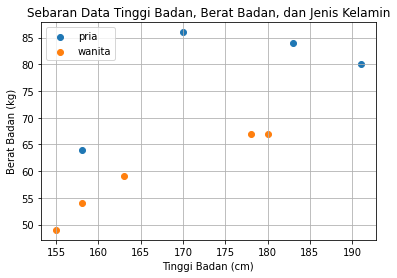

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)
    
plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

Sumbu x akan berasosiasi dengan tinggi badan sedangkan sumbu y akan berasosiasi  dengan berat badan.  Untuk membedakan jenis kelamin pria dan wanita menggunakan jenis warna marker yang berbeda. 

Langkah yang dapat dilakukan pertama kali adalah dengan mengimport matpolib.pyplot as plt.  Kemudian membentuk subplots dengan menangkap objek figure dan axesnya. Selanjutnya akan dilakukan looping terhadap data sensus_df ini di mana sensus_df nya di buat group terlebih dahulu berdasarkan jk atau jenis kelamin. Selain data jk, ada juga d yang adalah sekumpulan baris data dari kelompok jenis kelamin tertentu. Selanjutnya pada saat pembentukan scatter plot maka perlu memanggil ax.scatter yang akan berisi sumbu x yang berasosiasi dengan data baris drngan kolom tinggi sedangkan sumbu y nya berisi data baris dengan kolom berat dan menyertakan label yang berasosiasi dengan jenis kelamin. 

Keterangan tambahan:

plt.legend(loc='upper left') #berasosiasi dengan label jk,  yaitu pria dan wanita #loc berfungsi untuk menentukan lokasi, dalam kasus ini kiri atas

plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin') #judul

plt.xlabel('Tinggi Badan (cm) ') #label sumbu x

plt.ylabel('Berat Badan (kg) ') #label sumbu y

plt.grid(True) #untuk memunculkan grid

plt.show() #untuk memunculkan hasil plotting

_Classification dengan KNN_

Preprocessing Dataset

In [3]:
import numpy as np

X_train = np.array(sensus_df[['tinggi', 'berat']])
y_train = np.array(sensus_df['jk'])

print(f'X_train:\n{X_train}\n')
print(f'y_train: {y_train}')

X_train:
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train: ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


Mengimport numpy, kemudian membuat 2 buah numpy array.  Numpy array yang pertama berdasarkan kolom tinggi dan kolom berat dari sensus df. Numpy array krdua akan berdasarkan jenis kelamin dari sensus df. Numpy array pertana ditampung pada variabel X_train, numpy array kedua ditampung dalam variabel y_train. X_train berisi nilai feature,  sedangkan y_train berisi kumpulan target. 

In [4]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


Label binarizer digunakan untuk melakukan konfersi nilai string menjadi numerik.  Pada kasus kali ini adalah y_train. 

Import label binarizer, kemudian membentuk objek label binarizer yang ditampung dalam variabel lb.  Objek label binarizer ini digunakan untuk transfer data y_train yang ditampung pada variabel y_train. Kemudian lakukan print untuk mendapatkan hasilnya. 

Nilai 0 akan merepresentasikan data pria dan nilai 1 merepresentasikan wanita.

In [5]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 0 1 1 1 1 1]


Methode flatten digunakan untuk transformasi data dua dimensi tadi menjadi satu dimensi dengan menggunakan variabel y_train

Training KNN Classification Model

In [6]:
from sklearn.neighbors import KNeighborsClassifier

K = 3
model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Import sklearn terlebih dahulu. Terdspst 1 parameter K yang harus diklasifikasikan nilainya. Nilai paramter K diset menjadi 3 yang mana nilai ini akan dilakukan untuk mrnrntukan jumlah tetangga terdekat yangbakan dilibatkan. Setelah itu membentuk objek dari KNeighborsClassifier yang membutuhkan 1 parameter yang diberi nilai n_neighbors=K yang ditampung dalam variabel model. Setelah itu melakukan proses training dengan memanggil model

Prediksi Jenis Kelamin

In [7]:
tinggi_badan = 155
berat_badan = 70
X_new = np.array([tinggi_badan, berat_badan]).reshape(1, -1)
X_new

#Reshape digunakan untuk membuat 2 dimensi. Array numpy tersebut ditampung pada variabel X_new.

array([[155,  70]])

In [8]:
y_new = model.predict(X_new)
y_new

#Variabel y_new adalah untuk memprediksi gender atau jenis kelamin

array([1])

In [9]:
lb.inverse_transform(y_new)

#Untuk memanggil nilai label binarizer untuk mengetahui nilai 0 atau 1.

array(['wanita'], dtype='<U6')

Visualisasi Nearest Neighbours

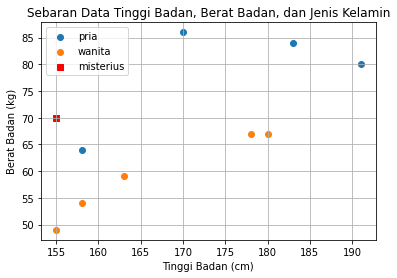

In [10]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label=jk)

plt.scatter(tinggi_badan,
           berat_badan,
           marker='s',
           color='red',
           label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi Badan, Berat Badan, dan Jenis Kelamin')
plt.xlabel('Tinggi Badan (cm)')
plt.ylabel('Berat Badan (kg)')
plt.grid(True)
plt.show()

Kalkulasi Distance (Euclidean Distance)

Mengukur jarak atau kedekatan antara 1 data poin dengan data poin lainnya pada dataset. 

t : merepresentasikan tinggi badan.

b : merepresentasikan berat badan.

t1 : merepresentasikan data tinggi badan dari data point yang pertama.

t2 : merepresentasikan data tinggi badan dari data point yang kedua.


b1 : merepresentasikan data berat badan dari data point yang pertama.

b2 : merepresentasikan data berat badan dari data point yang kedua.


In [11]:
misterius = np.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [12]:
X_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [13]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius, d) for d in X_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [14]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

#diurutkan berdasarkan data nilai terkecil sampai terbesar 

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


Evaluasi KNN Classification Model

Testing Set

In [15]:
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()

print(f'X_test:\n{X_test}\n')
print(f'y_test:\n{y_test}')

#Methode binarizer untuk transformasi string ke numerik.  Methode flatten untuk mengubah array 2 dimensi. 

X_test:
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[0 0 1 1]


Prediksi Terhadap Testing Set

In [16]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 1, 1])

Accuracy

Akurasi adalah propodi dari instance yang berhasil diprediksi dengan tepat.


tp = true positive

tn = true negative

fp = false postive

fn = false negative


True postif dan truen negatif merepresentasikan hasil prediksi atau klasifikasi yang benar. True postive berarti sesuatu yang bernilai positif telah dengan tepat diprediksi sebagai positif oleh model, sedangkan true negative berarti sesuatu yang bernilai negatif telah dengan tepat diprediksi sebagai sesuatu yang negatif oleh model atau dengan kata lain.

In [17]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)

print(f'Accuracy: {acc}')

Accuracy: 0.75


Precission

Precision merupakan proposi dari testing set yang diprediksi positif sebagai model yang benar-benar positif. 

tp : merepresentasikan nilai true positive.

fp : merepresentasikan nilai false positive.

In [18]:
from sklearn.metrics import precision_score

prec = precision_score(y_test, y_pred)

print(f'Precission: {prec}')

Precission: 0.6666666666666666


Recall

Recall adalah proposi dari data yang positif dari prediksi positif.

tp : merepresentasikan nilai true positive.

fn : merepresentasikan nilai false negativ.

In [19]:
from sklearn.metrics import recall_score

rec = recall_score(y_test, y_pred)

print(f'Recall: {rec}')


Recall: 1.0


F1 Score

F1 score merupakan nilai ratarata harmonik dari precission dengan recall. 


In [20]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)

print(f'F1-score: {f1}')

F1-score: 0.8


Classification Report

In [21]:
from sklearn.metrics import classification_report

cls_report = classification_report(y_test, y_pred)

print(f'Classification Report :\n{cls_report}')

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



Matthews Correlation Coefficient (MCC) 

MCC merupakan alternatif untuj f1 score untuk keperluaf classifier

MCC tertinggi bernilai 1

Rentang nilai MCC dari -1 untuk nilai terburuk dan 1 untuk nilai yang sempurna

In [22]:
from sklearn.metrics import matthews_corrcoef

mcc = matthews_corrcoef(y_test, y_pred)

print(f'MCC: {mcc}')

MCC: 0.5773502691896258


*SUMBER : https://www.youtube.com/watch?v=4zARMcgc7hA*